In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# model metrics 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# import models

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

import os

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
df = pd.read_csv('bank.csv', sep=';',header='infer')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19.0,oct,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11.0,may,220.0,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16.0,apr,185.0,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.0,jun,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5.0,may,226.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30.0,jul,329.0,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9.0,may,153.0,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19.0,aug,151.0,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6.0,feb,129.0,4,211,3,other,no


In [3]:
df.shape

(4521, 17)

In [4]:
df.describe()

,age,day,duration,campaign,pdays,previous
count,4521.000000,4520.000000,4519.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,15.915487,263.984952,2.793630,39.766645,0.542579
std,10.576211,8.248569,259.896301,3.109807,100.121124,1.693562
min,19.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4518 non-null object
marital      4518 non-null object
education    4518 non-null object
default      4521 non-null object
balance      4520 non-null object
housing      4520 non-null object
loan         4521 non-null object
contact      4518 non-null object
day          4520 non-null float64
month        4521 non-null object
duration     4519 non-null float64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4518 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 600.6+ KB


## Visualizing the data and analyze the features

In [6]:
df_features = pd.DataFrame()

In [7]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance       object
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [8]:
df.describe() # Numerical Data

,age,day,duration,campaign,pdays,previous
count,4521.000000,4520.000000,4519.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,15.915487,263.984952,2.793630,39.766645,0.542579
std,10.576211,8.248569,259.896301,3.109807,100.121124,1.693562
min,19.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
df.describe(include=['O']) # Describe categorical features

,job,marital,education,default,balance,housing,loan,contact,month,poutcome,y
count,4518,4518,4518,4521,4520,4520,4521,4518,4521,4521,4518
unique,12,3,5,2,2352,2,2,3,12,4,6
top,management,married,secondary,no,0,yes,no,cellular,may,unknown,no
freq,968,2796,2304,4445,357,2558,3830,2894,1398,3705,3988


In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19.0,oct,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11.0,may,220.0,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16.0,apr,185.0,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.0,jun,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5.0,may,226.0,1,-1,0,unknown,no


In [11]:
df['y'] = df['y'].str.lower()

## Target Variable: y


In [12]:
def yes_no_encoder(data):
    if 'no' in data:
        data = 0
    elif 'yes' in data:
        data = 1
    
    return data

### Convert categorical variables to numeric variables

In [13]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
------------------------------------------------------------
job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown' nan]
------------------------------------------------------------
marital
['married' 'single' 'divorced' nan]
------------------------------------------------------------
education
['primary' 'secondary' 'tertiary' 'unknown' nan 'na']
------------------------------------------------------------
default
['no' 'yes']
------------------------------------------------------------
balance
['1787' '4789' '1350' ... '-333' '-3313' '1137']
------------------------------------------------------------
housing
['no' 'yes' nan]
--------------------------------------------------------

In [14]:
df['y'].replace({np.nan:'no'}, inplace = True)

In [15]:
df['y'].dtypes

dtype('O')

In [16]:
df['y'] = df['y'].apply(yes_no_encoder)

In [17]:
df['y']

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [18]:
df_features['y'] = df['y']

0    4000
1     521
Name: y, dtype: int64


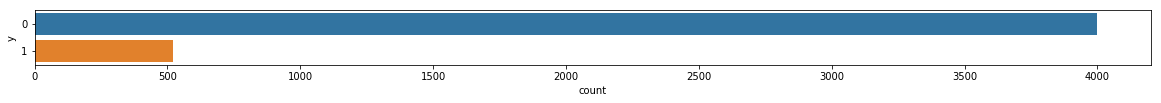

In [19]:
fig = plt.figure(figsize=(20, 1))
sns.countplot(y='y', data=df)
print(df.y.value_counts())

### Feature: Age

In [20]:
df['age'].dtype

dtype('int64')

In [21]:
df['age'].isnull().sum()

0

In [22]:
df_features['age'] = df['age']

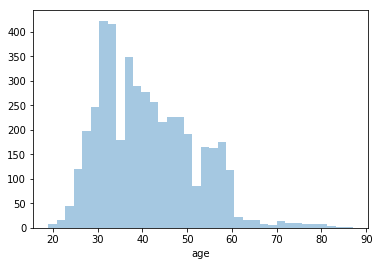

In [23]:
sns.distplot(df_features['age'], kde = False)

### Feature: Job

In [24]:
df_features['job'] = df['job']

In [25]:
df['job'].dtype

dtype('O')

In [26]:
df['job'].isnull().sum()

3

In [27]:
df['job']

0          unemployed
1            services
2          management
3          management
4         blue-collar
            ...      
4516         services
4517    self-employed
4518       technician
4519      blue-collar
4520              NaN
Name: job, Length: 4521, dtype: object

In [28]:
df['job'].mode()

0    management
dtype: object

In [29]:
df['job'].replace({np.nan:'management'}, inplace = True)

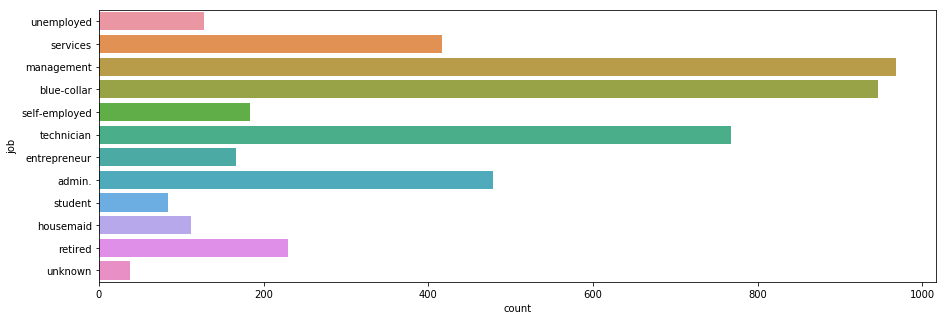

In [30]:
plt.figure(figsize=(15, 5))
sns.countplot(y='job', data=df_features)

### Feature: Marital

In [31]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
------------------------------------------------------------
job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
------------------------------------------------------------
marital
['married' 'single' 'divorced' nan]
------------------------------------------------------------
education
['primary' 'secondary' 'tertiary' 'unknown' nan 'na']
------------------------------------------------------------
default
['no' 'yes']
------------------------------------------------------------
balance
['1787' '4789' '1350' ... '-333' '-3313' '1137']
------------------------------------------------------------
housing
['no' 'yes' nan]
------------------------------------------------------------

In [32]:
df['marital'].isnull().sum()

3

In [33]:
df['marital'].mode()

0    married
dtype: object

In [34]:
df['marital'].dtype

dtype('O')

In [35]:
df['marital'].replace({np.nan:'married'}, inplace = True)

In [36]:
df['marital']

0       married
1       married
2        single
3       married
4       married
         ...   
4516    married
4517    married
4518    married
4519    married
4520    married
Name: marital, Length: 4521, dtype: object

In [37]:
# returns percentage distribution of all categorical items in a specified column
def value_perc(feature):
    perc = feature.value_counts(normalize=True).reset_index()
    perc.columns = ['value', 'perc']
    perc['perc'] = round( perc['perc'] * 100 , 2)
    return perc

In [38]:
df_features['marital'] = df['marital']

      value   perc
0   married  61.91
1    single  26.41
2  divorced  11.68


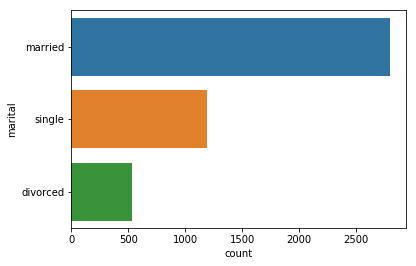

In [39]:
sns.countplot(y='marital', data=df_features)
print(value_perc(df_features.marital))

### Feature: Education

In [40]:
df_features['education'] = df['education']

In [41]:
df['education'].dtype

dtype('O')

In [42]:
df['education'].isnull().sum()

3

In [43]:
df['education'].mode()

0    secondary
dtype: object

In [44]:
df['education'].replace({np.nan:'secondary'}, inplace = True)

In [45]:
df['education'].replace({'na':'secondary'}, inplace = True)

In [46]:
df['education']

0         primary
1       secondary
2        tertiary
3        tertiary
4       secondary
          ...    
4516    secondary
4517     tertiary
4518    secondary
4519    secondary
4520     tertiary
Name: education, Length: 4521, dtype: object

In [47]:
df['education'].isnull().sum()

0

In [141]:
df_features['education'] = df['education']

In [142]:
df['education'].dtype

dtype('O')

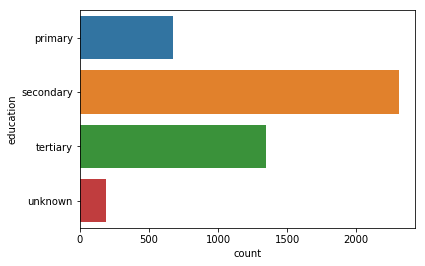

In [143]:
sns.countplot(y='education', data=df_features)

### Feature: default

In [50]:
df['default'].isnull().sum()

0

In [51]:
df['default'].mode()

0    no
dtype: object

In [52]:
df_features['default'] = df['default']

In [53]:
# conver categorical default values to numeric values
df_features['default'] = df_features['default'].apply(yes_no_encoder)

  value   perc
0    no  98.32
1   yes   1.68


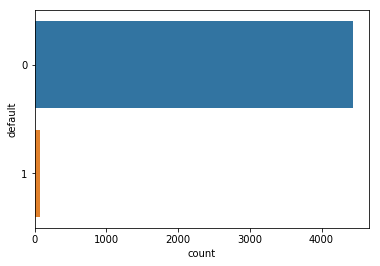

In [54]:
sns.countplot(y='default', data=df_features)
print(value_perc(df['default']))


### Feature: Balance

In [55]:
df['balance'].isnull().sum()

1

In [56]:
df['balance'].dtype

dtype('O')

In [57]:
df['balance'].isnull().sum()

1

In [65]:
df['balance'].isna().sum()

1

In [70]:
df['balance'].fillna(axis = 0, method = 'ffill')
df['balance'].isnull().sum()
df['balance'].dtype
df['balance'].isna().sum()

1

In [58]:
df_features['balance'] = df['balance']

In [63]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
------------------------------------------------------------
job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
------------------------------------------------------------
marital
['married' 'single' 'divorced']
------------------------------------------------------------
education
['primary' 'secondary' 'tertiary' 'unknown']
------------------------------------------------------------
default
['no' 'yes']
------------------------------------------------------------
balance
['1787' '4789' '1350' ... '-333' '-3313' '1137']
------------------------------------------------------------
housing
['no' 'yes' nan]
------------------------------------------------------------
loan
['no' '

In [71]:
df['balance'] = pd.to_numeric(df['balance'],errors='coerce')

In [76]:
df['balance'].apply(np.floor).mean()

1422.2682602921648

In [77]:
df['balance'].replace({np.nan:1422}, inplace = True)

In [79]:
df['balance'].isnull().sum()
df['balance'].dtype
#df['balance'].isna().sum()

dtype('float64')

In [80]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
------------------------------------------------------------
job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
------------------------------------------------------------
marital
['married' 'single' 'divorced']
------------------------------------------------------------
education
['primary' 'secondary' 'tertiary' 'unknown']
------------------------------------------------------------
default
['no' 'yes']
------------------------------------------------------------
balance
[ 1787.  4789.  1350. ...  -333. -3313.  1137.]
------------------------------------------------------------
housing
['no' 'yes' nan]
------------------------------------------------------------
loan
['no' 'y

In [82]:
df_features['balance'] = df['balance']

The mean balance:  1422.27
The mean balance:  3009.06


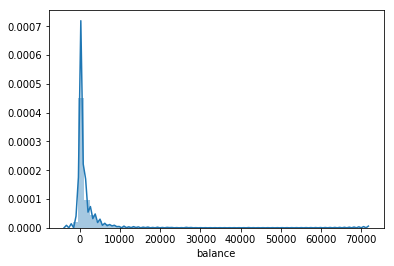

In [83]:
sns.distplot(df_features['balance'])
print("The mean balance: ", round(df_features['balance'].mean(), 2))
print("The mean balance: ", round(df_features['balance'].std(), 2))

In [84]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1,339,4,failure,0
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1,330,1,failure,0
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1,-1,0,unknown,0


### Feature: Housing

In [85]:
df['housing'].replace({np.nan:'yes'}, inplace = True)

In [86]:
df_features['housing'] = df['housing']

In [87]:
df_features['housing'] = df_features['housing'].apply(yes_no_encoder) 

  value  perc
0   yes  56.6
1    no  43.4


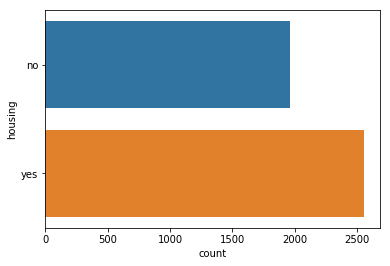

In [88]:
sns.countplot(y='housing', data=df)
print(value_perc(df['housing']))

### Feature: Loan

In [89]:
df['loan'].isna().sum()

0

In [90]:
df_features['loan'] = df['loan']



In [92]:
df_features['loan'] = df_features['loan'].apply(yes_no_encoder)

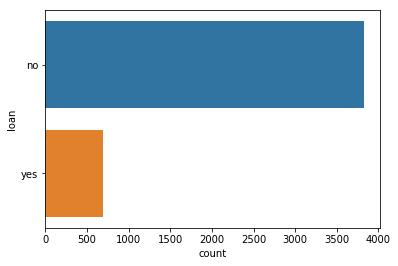

In [93]:
sns.countplot(y='loan', data=df)

### Feature: Contract

In [95]:
df['contact'].isna().sum()

3

In [97]:
df['contact'].mode()

0    cellular
dtype: object

In [98]:
df['contact'].replace({np.nan:'cellular'}, inplace = True)

In [99]:
df['contact'].isna().sum()

0

In [100]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
------------------------------------------------------------
job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
------------------------------------------------------------
marital
['married' 'single' 'divorced']
------------------------------------------------------------
education
['primary' 'secondary' 'tertiary' 'unknown']
------------------------------------------------------------
default
['no' 'yes']
------------------------------------------------------------
balance
[ 1787.  4789.  1350. ...  -333. -3313.  1137.]
------------------------------------------------------------
housing
['no' 'yes']
------------------------------------------------------------
loan
['no' 'yes']

In [101]:
df_features['contact'] = df['contact']

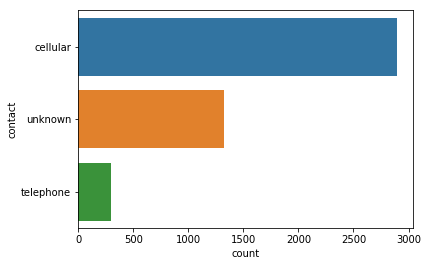

In [102]:
sns.countplot(y='contact', data=df_features)

### Feature: Day

In [103]:
df['day'].isna().sum()

1

In [104]:
df['day'].mode()

0    20.0
dtype: float64

In [105]:
df['day'].replace({np.nan:20}, inplace = True)

In [106]:
df_features['day'] = df['day']

Mean number of day:  15.916390179163901
Mean number of day:  8.247879795777969


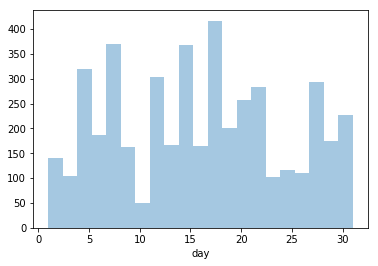

In [107]:
sns.distplot(df_features['day'], kde=False)
print("Mean number of day: ", df_features['day'].mean())
print("Mean number of day: ", df_features['day'].std())

### Feature: Month

In [108]:
df['month'].dtype

dtype('O')

In [109]:
df['month'].isna().sum()

0

In [110]:
df_features['month'] = df['month']

   value   perc
0    may  30.92
1    jul  15.62
2    aug  14.00
3    jun  11.75
4    nov   8.60
5    apr   6.48
6    feb   4.91
7    jan   3.27
8    oct   1.77
9    sep   1.15
10   mar   1.08
11   dec   0.44


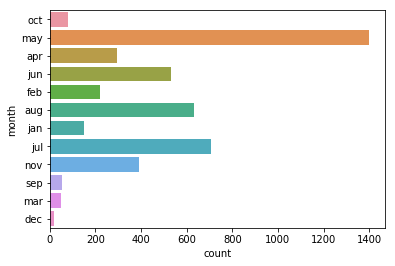

In [111]:
sns.countplot(y='month', data=df_features)
print(value_perc(df_features['month']))

### Feature: Duration

In [112]:
df['duration'].dtype

dtype('float64')

In [114]:
df['duration'].isna().sum()

2

In [115]:
df['duration'].mode()

0    123.0
dtype: float64

In [116]:
df['duration'].replace({np.nan:123}, inplace = True)

In [117]:
df['duration'].isna().sum()

0

In [118]:
df_features['duration'] = df['duration']

Mean duration:  263.9225834992258
Std.Dev duration:  259.8557117094297


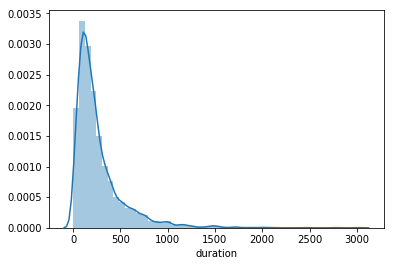

In [119]:
sns.distplot(df_features['duration'])
print("Mean duration: ", df_features['duration'].mean())
print("Std.Dev duration: ", df_features['duration'].std())

### Feature: Campaign

In [120]:
df['campaign'].dtype

dtype('int64')

In [121]:
df['campaign'].isna().sum()

0

In [122]:
df_features['campaign'] = df['campaign']

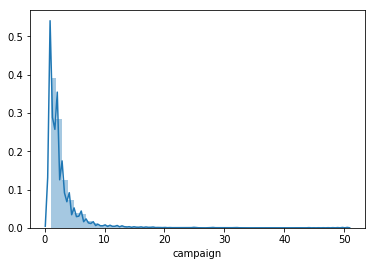

In [123]:
sns.distplot(df_features['campaign'])

### Feature: pdays

In [126]:
df['pdays'].dtype

dtype('int64')

In [127]:
df['pdays'].isna().sum()

0

In [128]:
df_features['pdays'] = df['pdays']

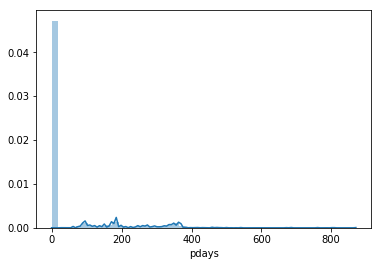

In [129]:
sns.distplot(df_features['pdays'])

### Feature: previous

In [130]:
df['previous'].dtype

dtype('int64')

In [131]:
df['previous'].isna().sum()

0

In [132]:
df_features['previous'] = df['previous']

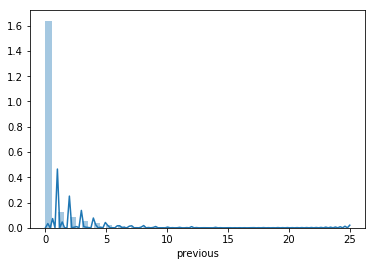

In [133]:
sns.distplot(df_features['previous'])

### Feature: Poutcome

In [134]:
df['poutcome'].dtype

dtype('O')

In [135]:
df['poutcome'].isna().sum()

0

In [136]:
df_features['poutcome']=  df['poutcome']

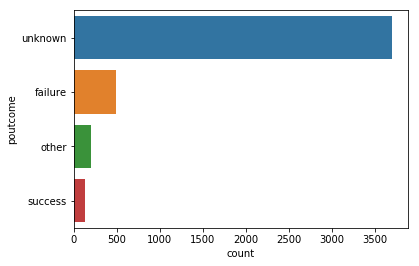

In [137]:
sns.countplot(y='poutcome', data=df_features)

In [147]:
# check for missing values
def missing_values(data):
    return data.isnull().sum()

missing_values(df_features)

y            0
age          0
job          3
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [139]:
df['education'].isna().sum()

0

In [140]:
df['education'].dtype

dtype('O')

## Data Preperation

### Feature Encoding

In [148]:
# get all categorical feature
obj_cols = df_features.select_dtypes(include=['object']).columns

In [149]:
# get dummies for string features
df_features = pd.get_dummies(df_features, columns=obj_cols, drop_first=True)

## Train and Test Split

In [151]:
y_t = df_features['y']
X = df_features.drop(['y'], axis=1)


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size=0.2, random_state=42)
X_cols = X_train.columns

## Feature Scaling

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the machine learning model

In [156]:
# train the model and use it to predict the label for unseen data
def fit_ml_algo(algo, X_train, y_train, X_test, y_test):
    
    model = algo.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = round(accuracy_score(y_pred, y_test) * 100, 2)
    cf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = precision_score(y_pred, y_test)
    f1 = f1_score(y_test, y_pred)
     
    return acc, cf_matrix, precision, recall, f1, model

## Logistic Regression

Accuracy:  90.17
Precision:  0.6
Recall:  0.2755102040816326
F1 Score:  0.3776223776223776


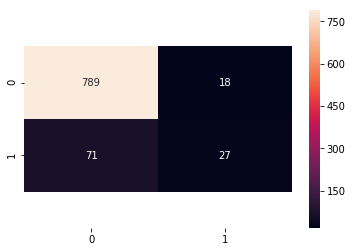

In [157]:
acc, cf_matrix, precision, recall, f1, model = fit_ml_algo(LogisticRegression(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

## Random Forest

Accuracy:  89.5
Precision:  0.5405405405405406
Recall:  0.20408163265306123
F1 Score:  0.2962962962962963


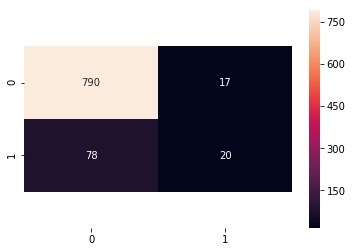

In [158]:
acc, cf_matrix, precision, recall, f1, model = fit_ml_algo(RandomForestClassifier(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

## SVM

Accuracy:  90.5
Precision:  0.6363636363636364
Recall:  0.2857142857142857
F1 Score:  0.39436619718309857


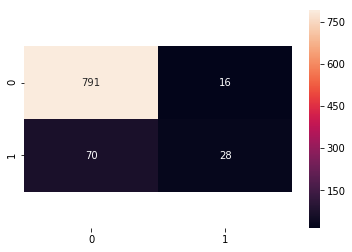

In [160]:
acc, cf_matrix, precision, recall, f1, model = fit_ml_algo(LinearSVC(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

## Gradient Boosting

Accuracy:  89.83
Precision:  0.5517241379310345
Recall:  0.32653061224489793
F1 Score:  0.41025641025641024


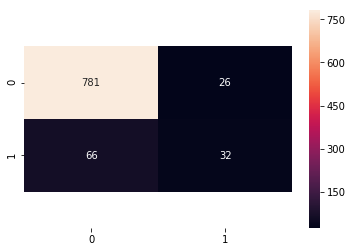

In [161]:
acc, cf_matrix, precision, recall, f1, model = fit_ml_algo(GradientBoostingClassifier(), X_train, y_train, X_test, y_test)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

## Adaboost

Accuracy:  89.72
Precision:  0.5384615384615384
Recall:  0.35714285714285715
F1 Score:  0.4294478527607362


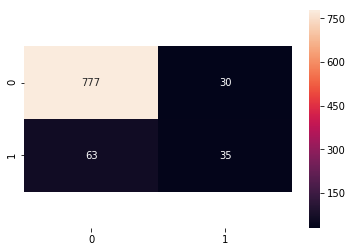

In [162]:
acc, cf_matrix, precision, recall, f1, model = fit_ml_algo(AdaBoostClassifier(n_estimators=100), X_train, y_train, X_test, y_test)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

In [163]:
pd.DataFrame({'feature': X_cols, 'Importance': model.feature_importances_})

,feature,Importance
0,age,0.09
1,default,0.01
2,balance,0.12
3,housing,0.01
4,loan,0.01
5,day,0.06
6,duration,0.29
7,campaign,0.05
8,pdays,0.10
9,previous,0.04
